# MNIST Digit classification using CNN
- This is the `hello world` of deep learning

## 1. Import section

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

## 2. Load the mnist data set
- This dataset contains gray images of hand-written digits from 0 - 9.
- The shape of each image is (28 x 28) pixels.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### 2.1 Check the shape of the training and test data sets

In [3]:
print(f'Shape of x_train: {x_train.shape}\nShape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}\nShape of y_test: {y_test.shape}')

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


### 2.2 Display few images from the training data

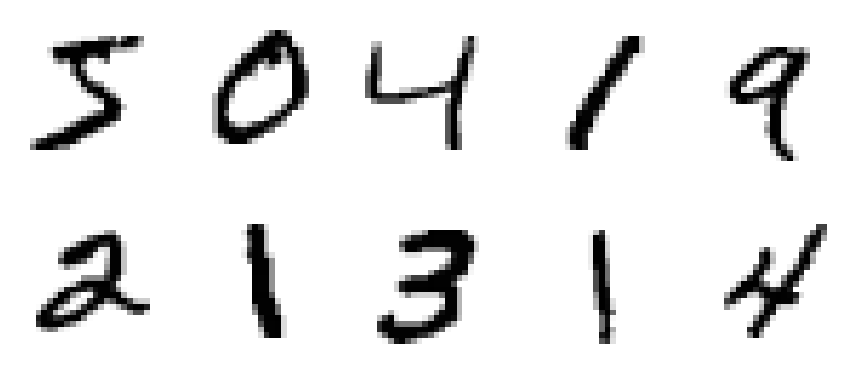

In [4]:
fig, axes = plt.subplots(2, 5, figsize = (12, 6))
axes = axes.flatten()

for img, ax in zip(x_train[:10], axes):
    ax.imshow(img, cmap = plt.cm.binary)
    ax.axis('off')
    
plt.tight_layout()
plt.show()

### 2.3 Add channel dimension to the training and test data
- Tensorflow requires image data in the form of (batch_size, image_height, image_width, channel) 

In [5]:
x_train = np.expand_dims(x_train, axis = 3)
x_test = x_test[:, :, :, np.newaxis]
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')

Shape of x_train: (60000, 28, 28, 1)
Shape of x_test: (10000, 28, 28, 1)


## 3. CNN model architecture
- The most basic form of a CNN model is the repeating blocks of Conv-->pool layers. 
- The number of channels increases while the spatial dimension of the image decreases as we go deeper into the network.
- This is followed by a flatten layer and dense layer to make the classification
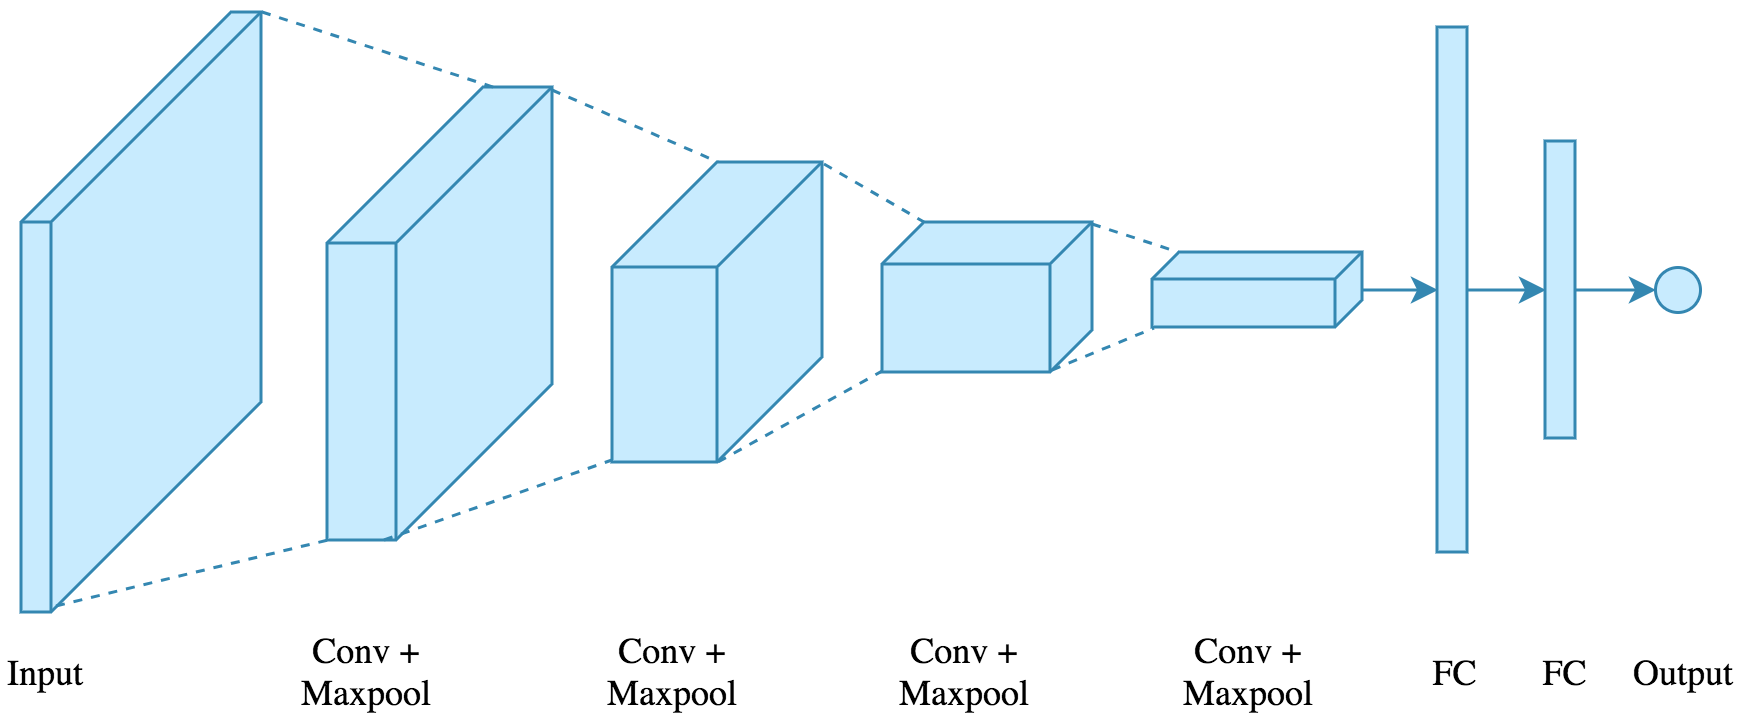

In [6]:
# define and build model using sequential API
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu', 
                 input_shape = (28, 28, 1)))

model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation = 'softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0

### 3.1 Convert the training and test labels into one hot encoding

In [7]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 3.2 Compile and fit the model

In [8]:
## compile method needs three parameters
# optimizer: for carrying out gradient descent to train the model weights
# loss: to compute the error while training the model
# metrics: check the model performance during training 
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## fit method trains the model on the data
history = model.fit(x_train, y_train,   # input image-label pairs
                    batch_size = 32,    # batch size of input data to the model
                    epochs = 8,         # number of epochs to train the model
                    validation_data = (x_test, y_test))   # validation data to check the generalization performance of the model

Epoch 1/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4372 - accuracy: 0.8754 - val_loss: 0.0527 - val_accuracy: 0.9834
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1313 - accuracy: 0.9624 - val_loss: 0.0585 - val_accuracy: 0.9832
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1083 - accuracy: 0.9705 - val_loss: 0.0402 - val_accuracy: 0.9875
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0920 - accuracy: 0.9749 - val_loss: 0.0432 - val_accuracy: 0.9878
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0858 - accuracy: 0.9761 - val_loss: 0.0379 - val_accuracy: 0.9877
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0809 - accuracy: 0.9769 - val_loss: 0.0326 - val_accuracy: 0.9907
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9797 - val_loss: 0.0410 - val_accuracy: 0.9887

### 3.3 Plot the loss and accuracy of training and validation data

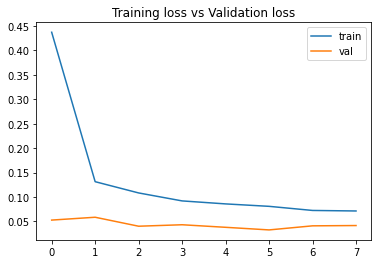

In [9]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Training loss vs Validation loss')
plt.legend(['train', 'val']);

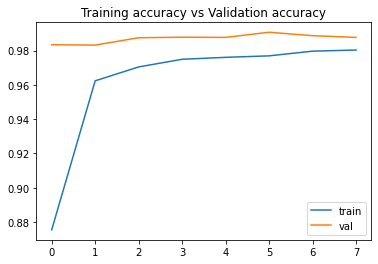

In [10]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Training accuracy vs Validation accuracy')
plt.legend(['train', 'val']);

- Model did overfit the training data in the last two epochs. Use image augmentation to reduce overfitting.

## 4. Data augmentation

In [11]:
# Apply transformations to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# define augmentation operations for training data
train_aug = ImageDataGenerator(rescale = 1./ 255,         # rescale image in the range (0 - 1)
                               width_shift_range = 0.1,   # vary the width of the image by 10%
                               height_shift_range = 0.1,  # vary the height of the image by 10%
                               rotation_range = 15,       # rotate the image by 15 degrees
                               zoom_range = 0.1,          # zoom the image by 10%
                               shear_range = 0.1)         # shear the image by 10%

# Only scaling and no augmentation for validation data
val_aug = ImageDataGenerator(rescale = 1.0 / 255)

### 4.1 Train the model using data augmentation

In [12]:
# Fit the Model on Augmented Images
history = model.fit(train_aug.flow(x_train, y_train, batch_size = 32), 
                    steps_per_epoch = len(x_train) // 32,        # number of steps required to complete one epoch of training 
                    epochs = 10,                                 # number of epochs to train the model 
                    validation_data = val_aug.flow(x_test, y_test), 
                    validation_steps = len(x_test) // 32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5797 - accuracy: 0.8032 - val_loss: 0.0604 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1624 - accuracy: 0.9516 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1222 - accuracy: 0.9641 - val_loss: 0.0333 - val_accuracy: 0.9892
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1079 - accuracy: 0.9683 - val_loss: 0.0307 - val_accuracy: 0.9901
Epoch 5/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0942 - accuracy: 0.9721 - val_loss: 0.0242 - val_accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0842 - accuracy: 0.9744 - val_loss: 0.0272 - val_accuracy: 0.9918
Epoch 7/10
1875/1875 [==========================

### 4.2 Plot the loss and accuracy on the augmented data

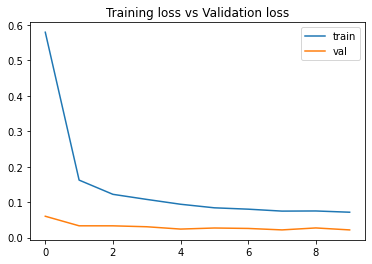

In [13]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Training loss vs Validation loss')
plt.legend(['train', 'val']);

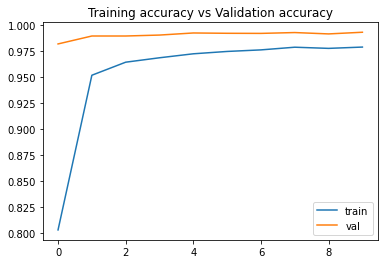

In [14]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Training accuracy vs Validation accuracy')
plt.legend(['train', 'val']);

- Data augmentation improved the model performance and also prevented the model from overfitting the training data.